<a href="https://colab.research.google.com/github/vcfq/Competencia-y-Regulaci-n/blob/Avance/Pregunta1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pregunta 1

In [ ]:
import pandas as pd

url_base1 = 'https://raw.githubusercontent.com/vcfq/Competencia-y-Regulaci-n/main/base1.xlsx'
url_base2 = 'https://raw.githubusercontent.com/vcfq/Competencia-y-Regulaci-n/main/base2.xlsx'

df_1 = pd.read_excel(url_base1)
df_2 = pd.read_excel(url_base2)

--------
Estadística Descriptiva
--------

-----

Prestadores a lo largo del tiempo

-----

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#merge de bases
df = df_1.merge(df_2, on="ciudad")
df["poblacion_total"] = df["poblacion_inicial"] * (1 + df["crecimiento_anual"]) ** (df["year"] - 2001)
df["porcentaje_operados"] = df["num_operados"] / df["poblacion_total"]
df.head()

,ciudad,year,prestador,num_operados,tecnologia_alta,infraestructura,puntaje_doctor,precio,poblacion_inicial,crecimiento_anual,poblacion_total,porcentaje_operados
0,1,2001,Clinica_C,2959,0,5.706089,5.865759,8.765944,228037,0.056576,228037.0,0.012976
1,1,2001,Clinica_A,2082,0,8.610148,9.660213,11.450702,228037,0.056576,228037.0,0.009130
2,1,2001,Clinica_B,5863,0,6.579551,7.634988,9.217668,228037,0.056576,228037.0,0.025711
3,2,2001,Clinica_C,7136,0,5.578029,7.597013,9.390919,367336,0.054456,367336.0,0.019426
4,2,2001,Clinica_A,5140,0,8.173047,9.373381,11.336102,367336,0.054456,367336.0,0.013993


---

Estadísticas descriptivas

---

In [51]:
estadisticas = df.groupby("prestador").describe().round(2)
print(estadisticas)
estadisticas.columns = ['_'.join(col) for col in estadisticas.columns]
estadisticas.reset_index(inplace=True)
with open("estadisticas_prestador.tex", "w") as f:
    f.write(estadisticas.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:estadisticas_prestador"))

#precio
plt.figure()
sns.histplot(df, x="precio", hue="prestador", kde=True)
plt.title("Distribución de Precios por Prestador")
plt.tight_layout()
plt.savefig("precio_prestador.pdf")
plt.close()

#puntaje doctor
plt.figure()
sns.histplot(df, x="puntaje_doctor", hue="prestador", kde=True)
plt.title("Distribución de Puntaje de los Doctores por Prestador")
plt.tight_layout()
plt.savefig("puntaje_doctor_prestador.pdf")
plt.close()

#infraestructura
plt.figure()
sns.histplot(df, x="infraestructura", hue="prestador", kde=True)
plt.title("Distribución de Infraestructura Disponible por Prestador")
plt.tight_layout()
plt.savefig("infraestructura_prestador.pdf")
plt.close()



          ciudad                                            year           \
           count   mean   std  min  25%   50%   75%   max  count     mean   
prestador                                                                   
Clinica_A  148.0  10.22  5.79  1.0  5.0  10.0  15.0  20.0  148.0  2005.53   
Clinica_B  139.0  10.15  5.86  1.0  5.0  10.0  15.0  20.0  139.0  2005.35   
Clinica_C  144.0  10.76  5.64  1.0  6.0  11.0  16.0  20.0  144.0  2005.69   
Publico    146.0  10.97  5.69  1.0  6.0  11.0  16.0  20.0  146.0  2005.40   

           ... poblacion_total            porcentaje_operados              \
           ...             75%        max               count  mean   std   
prestador  ...                                                              
Clinica_A  ...       475794.60  960322.35               148.0  0.04  0.02   
Clinica_B  ...       484041.65  960322.35               139.0  0.02  0.01   
Clinica_C  ...       490509.16  933901.18               144.0  0.01  0.01  

-----

Proporción operados


-----

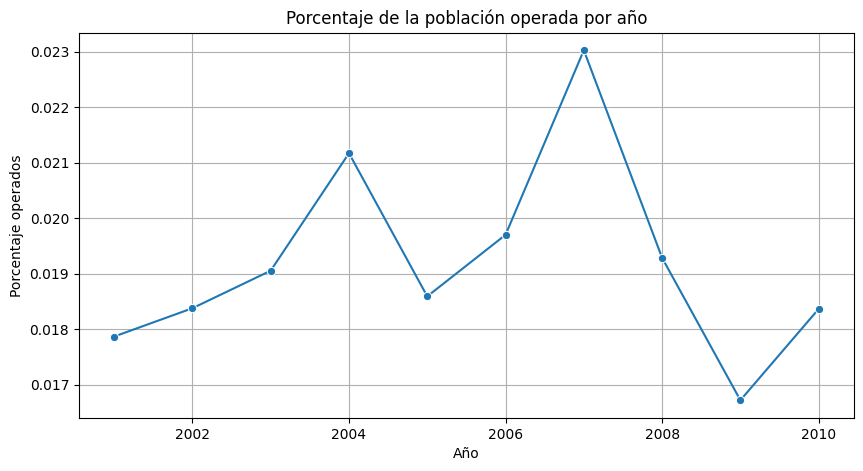

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#evolución evolución operaciones
evolucion = df.groupby("year").agg({
    "num_operados": "sum",
    "poblacion_total": "sum"
}).reset_index()
evolucion["porcentaje_operados"] = evolucion["num_operados"] / evolucion["poblacion_total"]

#gráfico evolución operaciones
plt.figure(figsize=(10, 5))
sns.lineplot(data=evolucion, x="year", y="porcentaje_operados", marker="o")
plt.title("Porcentaje de la población operada por año")
plt.ylabel("Porcentaje operados")
plt.xlabel("Año")
plt.grid(True)
plt.savefig("evolucion_operaciones.pdf", format="pdf")
plt.show()

# resumen = df.groupby("prestador")[["precio", "infraestructura", "puntaje_doctor", "tecnologia_alta"]].agg(["mean", "std", "min", "max"])
# resumen["num_operados_sum"] = df.groupby("prestador")["num_operados"].sum()
# resumen.columns = ["_".join(col).strip() for col in resumen.columns.values]
# resumen = resumen.reset_index()

# latex_output = resumen.to_latex(index=False, caption="Estadísticas descriptivas por prestador", label="tab:resumen_prestadores")
# with open("resumen_prestadores.tex", "w") as f:
#     f.write(latex_output)

files.download("evolucion_operaciones.pdf")

----


Avance en tecnología


----

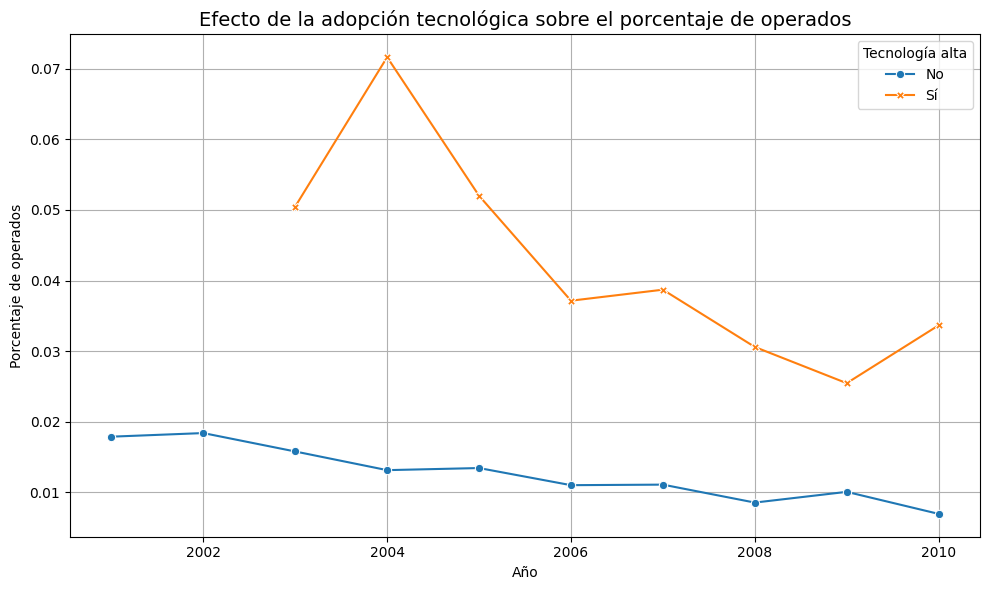

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Número de observaciones por grupo y año:
    year grupo  n_obs
0   2001    No     58
1   2002    No     60
2   2003    No     51
3   2003    Sí      6
4   2004    No     51
5   2004    Sí      8
6   2005    No     48
7   2005    Sí      7
8   2006    No     40
9   2006    Sí     17
10  2007    No     33
11  2007    Sí     23
12  2008    No     31
13  2008    Sí     26
14  2009    No     37
15  2009    Sí     23
16  2010    No     35
17  2010    Sí     23


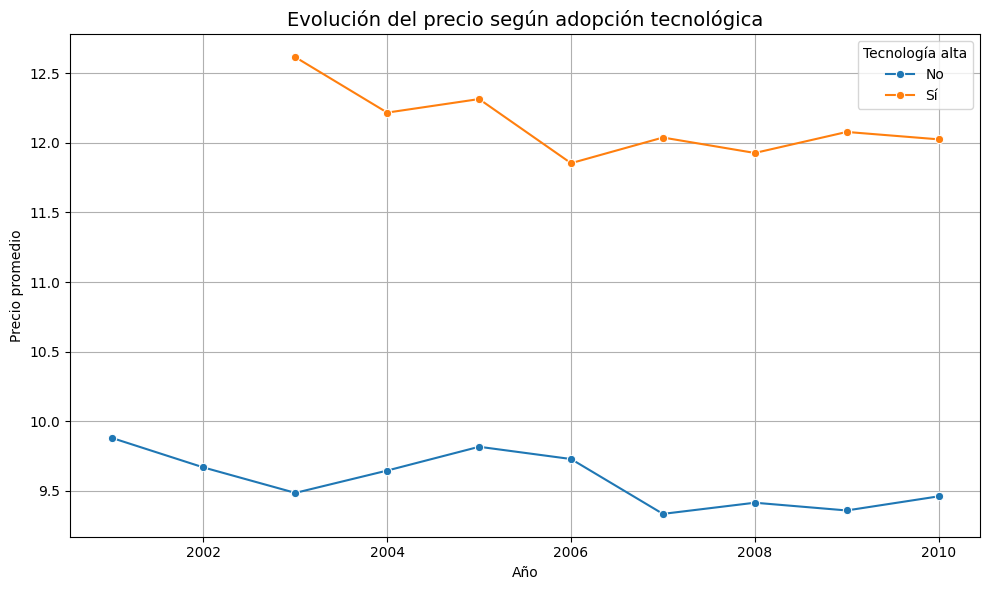

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#efecto del avance de la tecnología
tec = df.groupby(["year", "tecnologia_alta"]).agg({
    "num_operados": "sum",
    "poblacion_total": "sum",
    "prestador": "count"
}).reset_index()
tec["porcentaje_operados"] = tec["num_operados"] / tec["poblacion_total"]

#detalles gráfico tecnología
tec["grupo"] = tec["tecnologia_alta"].map({0: "No", 1: "Sí"})

plt.figure(figsize=(10, 6))
sns.lineplot(data=tec, x="year", y="porcentaje_operados", hue="grupo", style="grupo", markers=True, dashes=False)
plt.title("Efecto de la adopción tecnológica sobre el porcentaje de operados", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Porcentaje de operados")
plt.grid(True)
plt.legend(title="Tecnología alta")
plt.tight_layout()
plt.savefig("efecto_tecnologia.pdf", format="pdf")
plt.show()
files.download("efecto_tecnologia.pdf")

print("Número de observaciones por grupo y año:")
print(tec[["year", "grupo", "prestador"]].rename(columns={"prestador": "n_obs"}))

df["tecnologia_grupo"] = df["tecnologia_alta"].map({0: "No", 1: "Sí"})

#ahora efecto en precios
precio_tecnologia = df.groupby(["year", "tecnologia_grupo"])["precio"].mean().reset_index()

#gráfico en tec/precios
plt.figure(figsize=(10, 6))
sns.lineplot(data=precio_tecnologia, x="year", y="precio", hue="tecnologia_grupo", marker="o")
plt.title("Evolución del precio según adopción tecnológica", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Precio promedio")
plt.grid(True)
plt.legend(title="Tecnología alta")
plt.tight_layout()
plt.savefig("efecto_precio_tecnologia.pdf", format="pdf")
plt.show()
files.download("efecto_precio_tecnologia.pdf")

-----
Estimación logit
-----

----

Estimación de parámetros

----

In [57]:
import statsmodels.api as sm
import numpy as np

#participación de mercado por prestador
df["S_jm"] = df["num_operados"] / df["poblacion_total"]

#participación de la opción externa por mercado (ciudad-año)
S0 = df.groupby(["ciudad", "year"])["S_jm"].sum().reset_index(name="S_total")
S0["S0_m"] = 1 - S0["S_total"]

# Eliminar la columna S0_m si ya existe en df antes de hacer el merge
if 'S0_m' in df.columns:
    df = df.drop(columns=['S0_m'])

df = df.merge(S0[["ciudad", "year", "S0_m"]], on=["ciudad", "year"])

#calcular delta_jm
df["delta_jm"] = np.log(df["S_jm"]) - np.log(df["S0_m"])

#variables explicativas
X = df[["infraestructura", "puntaje_doctor", "tecnologia_alta", "precio"]]
X = sm.add_constant(X)
y = df["delta_jm"]

#estimar modelo logit agregado con errores estándar robustos
modelo_logit = sm.OLS(y, X).fit(cov_type='HC1')
print(modelo_logit.summary())

with open("regresion.tex", "w") as f:
    f.write(modelo_logit.summary2().as_latex())

                            OLS Regression Results                            
Dep. Variable:               delta_jm   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     839.1
Date:                Thu, 05 Jun 2025   Prob (F-statistic):          1.16e-237
Time:                        02:36:16   Log-Likelihood:                -190.27
No. Observations:                 577   AIC:                             390.5
Df Residuals:                     572   BIC:                             412.3
Df Model:                           4                                         
Covariance Type:                  HC1                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.8463      0.195     

------

2SLS

------

In [60]:
!pip install linearmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00


In [61]:
from linearmodels.iv import IV2SLS
import statsmodels.api as sm

#crear instrumentos: promedios de variables de otros prestadores en el mismo mercado
def other_mean(group, var):
    return group[var].transform(lambda x: (x.sum() - x) / (len(x) - 1))

for var in ["infraestructura", "puntaje_doctor", "tecnologia_alta"]:
    df[f"Z_{var}"] = df.groupby(["ciudad", "year"]).apply(lambda g: other_mean(g, var)).reset_index(drop=True)

#variables
y = df["delta_jm"]
X = sm.add_constant(df[["infraestructura", "puntaje_doctor", "tecnologia_alta", "precio"]])
Z = sm.add_constant(df[["infraestructura", "puntaje_doctor", "tecnologia_alta", "Z_infraestructura", "Z_puntaje_doctor", "Z_tecnologia_alta"]])

#modelo iv: precio instrumentado con características de otros prestadores
iv_model = IV2SLS(dependent=y,
                  exog=X[["const", "infraestructura", "puntaje_doctor", "tecnologia_alta"]],
                  endog=X[["precio"]],
                  instruments=Z[["Z_infraestructura", "Z_puntaje_doctor", "Z_tecnologia_alta"]]
                 ).fit()

print(iv_model.summary)

                          IV-2SLS Estimation Summary                          
Dep. Variable:               delta_jm   R-squared:                      0.1971
Estimator:                    IV-2SLS   Adj. R-squared:                 0.1914
No. Observations:                 577   F-statistic:                    347.14
Date:                Thu, Jun 05 2025   P-value (F-stat)                0.0000
Time:                        02:55:40   Distribution:                  chi2(4)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
const               7.0969     4.8883     1.4518     0.1466     -2.4841      16.678
infraestructura     0.1475     0

----

Matriz de correlación

----

In [62]:
def other_mean(group, var):
    return group[var].transform(lambda x: (x.sum() - x) / (len(x) - 1))

for var in ["infraestructura", "puntaje_doctor", "tecnologia_alta"]:
    df[f"Z_{var}"] = df.groupby(["ciudad", "year"]).apply(lambda g: other_mean(g, var)).reset_index(drop=True)

#estimar modelo IV para obtener α
X_exog = sm.add_constant(df[["infraestructura", "puntaje_doctor", "tecnologia_alta"]])
X_endog = df[["precio"]]
Z_instr = df[["Z_infraestructura", "Z_puntaje_doctor", "Z_tecnologia_alta"]]
Z_all = pd.concat([X_exog, Z_instr], axis=1)

iv_model = IV2SLS(df["delta_jm"], X_exog, X_endog, Z_instr).fit()
alpha = -iv_model.params["precio"]  # signo negativo porque en la ecuación va como -α * p
print("🔹 α estimado (IV):", alpha)

#calcular matrices de elasticidades por mercado
def calcular_matriz_elasticidad(mercado_df):
    n = len(mercado_df)
    matriz = np.zeros((n, n))
    S = mercado_df["S_jm"].values
    P = mercado_df["precio"].values

    for j in range(n):
        for k in range(n):
            if j == k:
                matriz[j, k] = -alpha * P[j] * (1 - S[j])
            else:
                matriz[j, k] = alpha * P[k] * S[k]
    return matriz

#generar promedios por año y por tipo tecnológico
matrices = []
for (ciudad, year), g in df.groupby(["ciudad", "year"]):
    if len(g) < 2:
        continue  # no calculamos para mercados con 1 solo prestador
    matriz = calcular_matriz_elasticidad(g)
    mean_elasticidad = matriz.mean()
    tiene_tec = g["tecnologia_alta"].mean() > 0
    matrices.append({
        "ciudad": ciudad,
        "year": year,
        "elasticidad_media": mean_elasticidad,
        "tecnologia_presente": "Sí" if tiene_tec else "No"
    })

resumen_matrices = pd.DataFrame(matrices)
display(resumen_matrices.groupby(["year", "tecnologia_presente"])["elasticidad_media"].mean().reset_index())

🔹 α estimado (IV): 2.289572826422871


,year,tecnologia_presente,elasticidad_media
0,2001,No,-8.087302
1,2002,No,-7.828603
2,2003,No,-8.325686
3,2003,Sí,-7.307071
4,2004,No,-7.516761
5,2004,Sí,-8.766422
6,2005,No,-8.446812
7,2005,Sí,-9.359477
8,2006,No,-8.793885
9,2006,Sí,-8.553507
